<a href="https://colab.research.google.com/github/omprabhatripathy/Covid-19-data-science-project/blob/main/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Covid -19** data analysis.

*Some leading questions about the pandamic *

*  what is the dynamics of pandamic ?i.e. number of death and number of recovery
*   what is the global death rate day per day?
*   whta is thegloal infection ate day per day ?
*  **how the infection and thedeath rates are related to each other?**








In [ ]:
#importing modues

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
#loading the data

data_csv = pd.read_csv('/content/coronavirus_dataset.csv')
data_csv

,Province.State,Country.Region,Lat,Long,date,cases,type
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,confirmed
1,NaN,Afghanistan,33.0000,65.0000,2020-01-23,0,confirmed
2,NaN,Afghanistan,33.0000,65.0000,2020-01-24,0,confirmed
3,NaN,Afghanistan,33.0000,65.0000,2020-01-25,0,confirmed
4,NaN,Afghanistan,33.0000,65.0000,2020-01-26,0,confirmed
...,...,...,...,...,...,...,...
89485,Zhejiang,China,29.1832,120.0934,2020-05-10,0,recovered
89486,Zhejiang,China,29.1832,120.0934,2020-05-11,0,recovered
89487,Zhejiang,China,29.1832,120.0934,2020-05-12,0,recovered
89488,Zhejiang,China,29.1832,120.0934,2020-05-13,0,recovered


**1.Question**

what isthe dynamics of pandamic?



*   what is the number of confirmed cases group by the date
*   what is number of deaths cases group by the dates



In [ ]:
confirm_data = data_csv[data_csv.type=='confirmed']
sum_confirm_by_date = confirm_data.groupby('date').agg({'cases':'sum'})
sum_confirm_by_date


,cases
date,
2020-01-22,555
2020-01-23,99
2020-01-24,287
2020-01-25,493
2020-01-26,684
...,...
2020-05-10,77690
2020-05-11,75803
2020-05-12,84245


In [ ]:
sum_confirm_by_date.head()

,cases
date,
2020-01-22,555
2020-01-23,99
2020-01-24,287
2020-01-25,493
2020-01-26,684


In [ ]:
death_data = data_csv[data_csv.type=='death']
sum_death_by_date = death_data.groupby('date').agg({'cases':'sum'})
sum_death_by_date.head()

,cases
date,
2020-01-22,17
2020-01-23,1
2020-01-24,8
2020-01-25,16
2020-01-26,14


**Plotting Data**

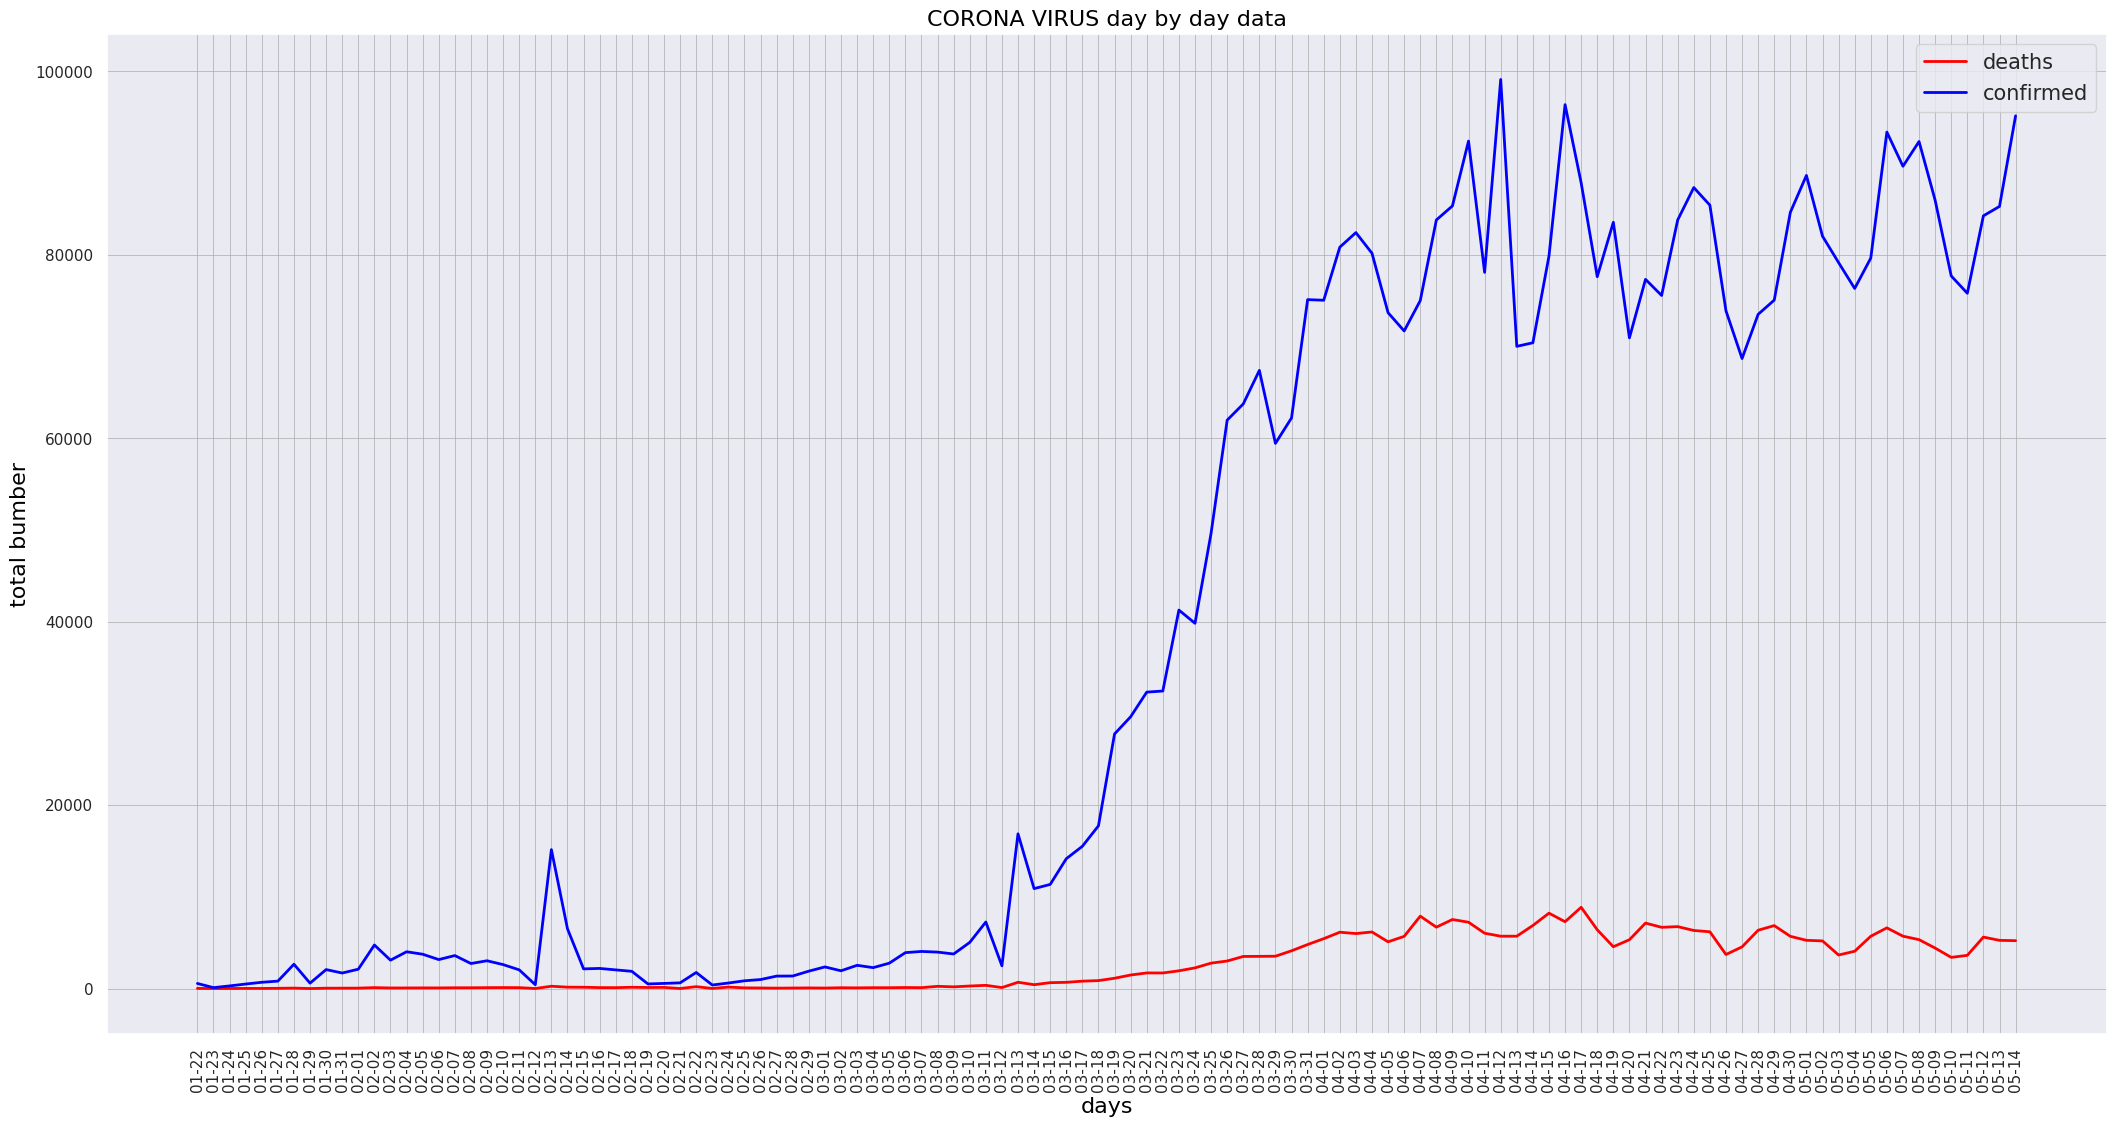

In [ ]:
days = [d.split('-')[1]+'-'+d.split('-')[2] for d in list(sum_death_by_date.index)]
#days = data1.index.strftime("%m%d")

deaths = sum_death_by_date.cases
confirmed = sum_confirm_by_date.cases

%matplotlib inline
fig = plt.figure(figsize=(40,20),facecolor='white',edgecolor='black')
axes = fig.add_axes([0.5,0.5,0.5,0.5])
font = {'color':'black','size' :16}
axes.plot(days,deaths,color='red',label='deaths',lw = 2)
axes.plot(days,confirmed,color='blue',label='confirmed',lw=2)

plt.xlabel('days',font)
plt.ylabel('total bumber',font)

plt.title('CORONA VIRUS day by day data',font)
plt.xticks(rotation = 90)
plt.grid(color='#ababab' , linestyle='-',linewidth= 0.5)
axes.legend(prop={'size':15})

**Log Curve**

In [ ]:
death_log = np.log10(deaths)
confirmed_log=np.log10(confirmed)

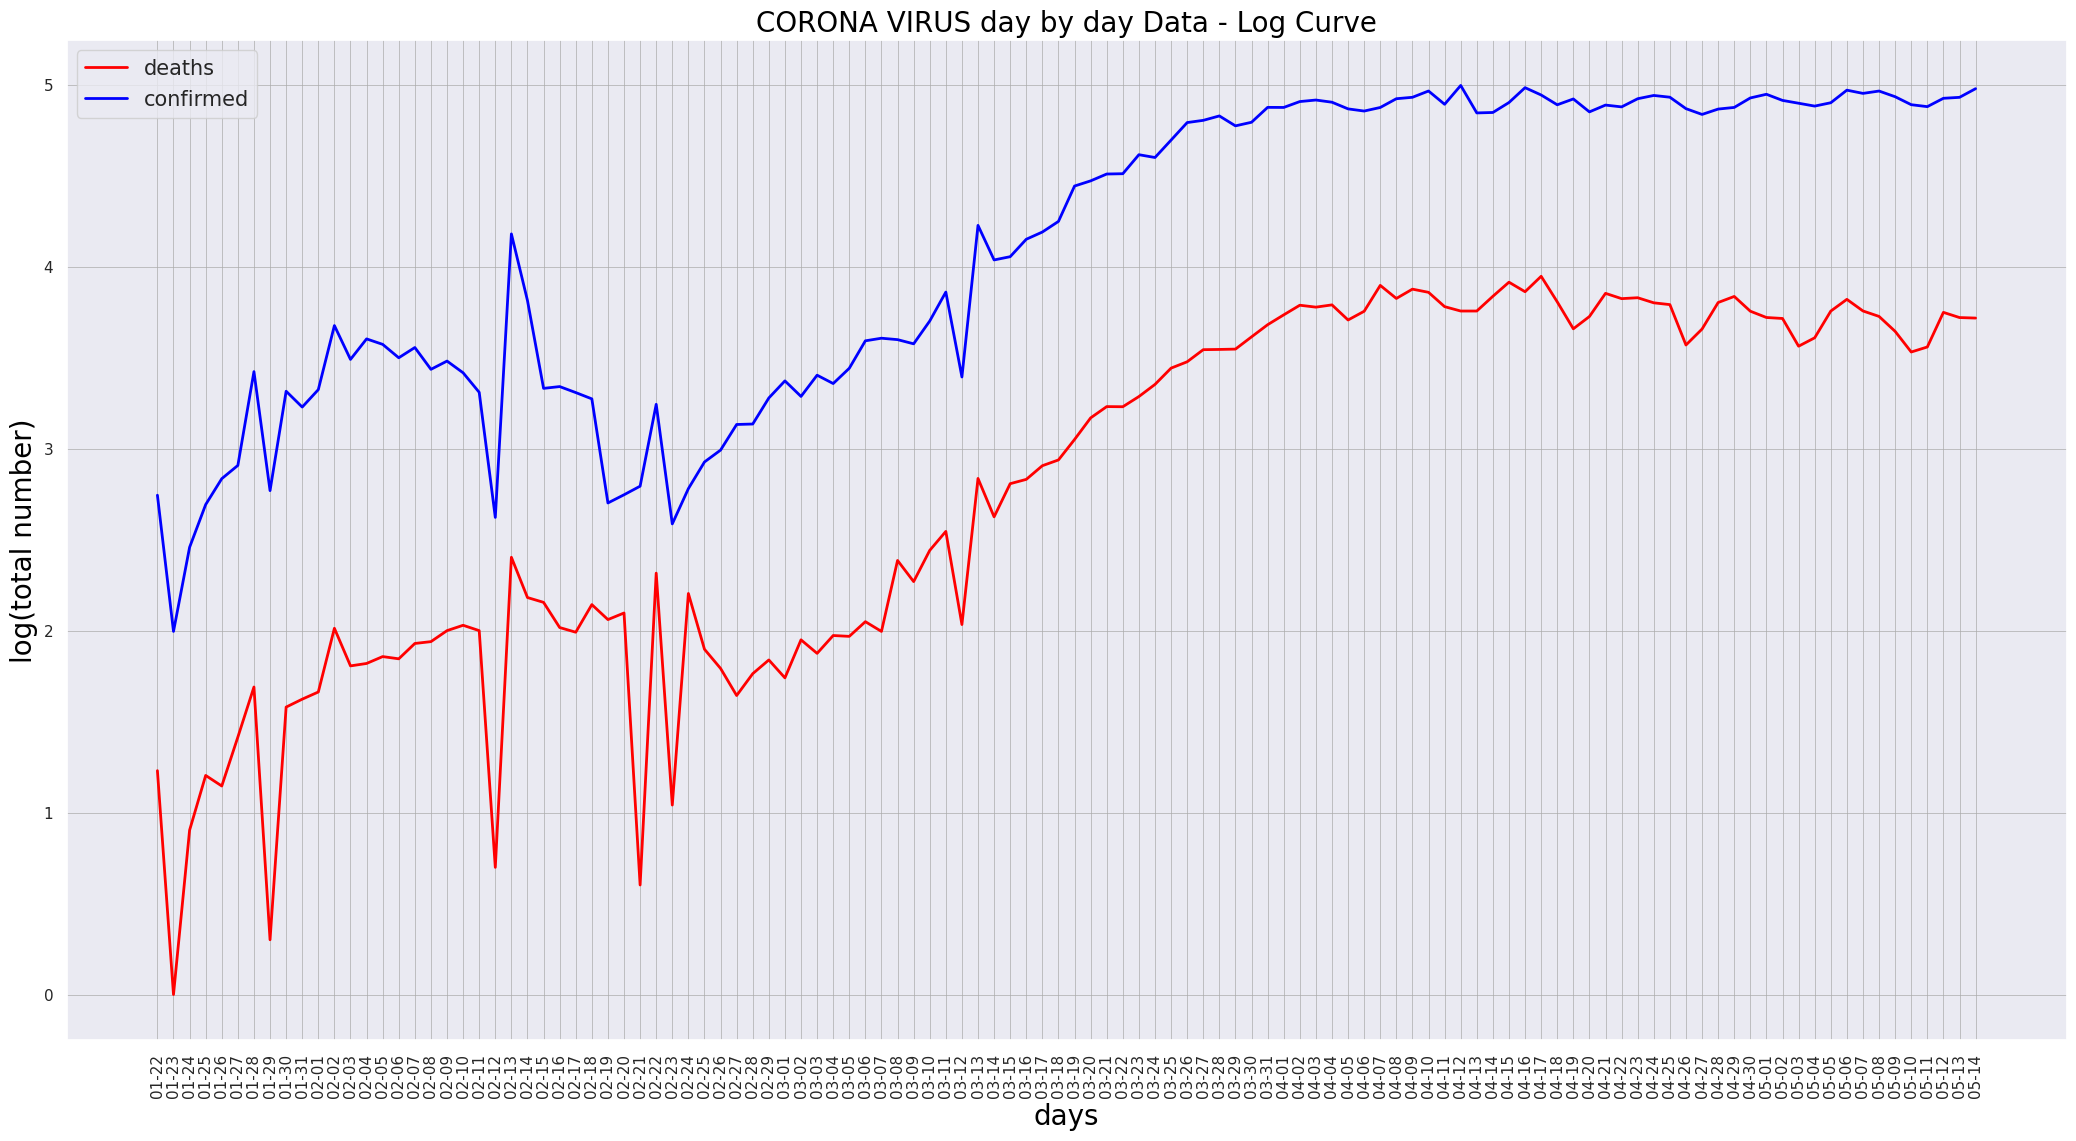

In [ ]:
fig = plt.figure(figsize=(40,20),facecolor='white',edgecolor ='black')
axes = fig.add_axes([0.5,0.5,0.5,0.5])
font = {'color' : 'black' ,'size':20}

axes.plot(days,death_log,color ='red',label='deaths',lw=2)
axes.plot(days,confirmed_log,color ='blue',label='confirmed',lw=2)

plt.xlabel('days',font)
plt.ylabel('log(total number)',font)
plt.title('CORONA VIRUS day by day Data - Log Curve',font)
plt.xticks(rotation=90)
plt.grid(color='#ababab',linestyle='-',linewidth=0.5)
axes.legend(prop={'size':15})


**Calculating Correlation Coeficient**

resemblance between death rate and infection rate

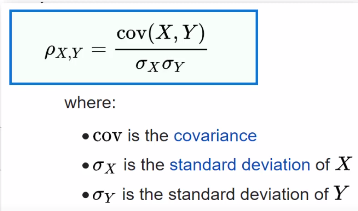

In [ ]:
coef = np.corrcoef(deaths,confirmed)
print(coef)

[[1.         0.95614746]
 [0.95614746 1.        ]]


**Question 2**
 what is global infection rate day per day

In [ ]:
confirmed= np.array(confirmed)
rate=[]
for i in range(1,len(confirmed)-1):
  today = confirmed[i]
  tomorrow = confirmed[i+1]
  rate.append(tomorrow-today)

In [ ]:
days = days[1:len(days)-1]

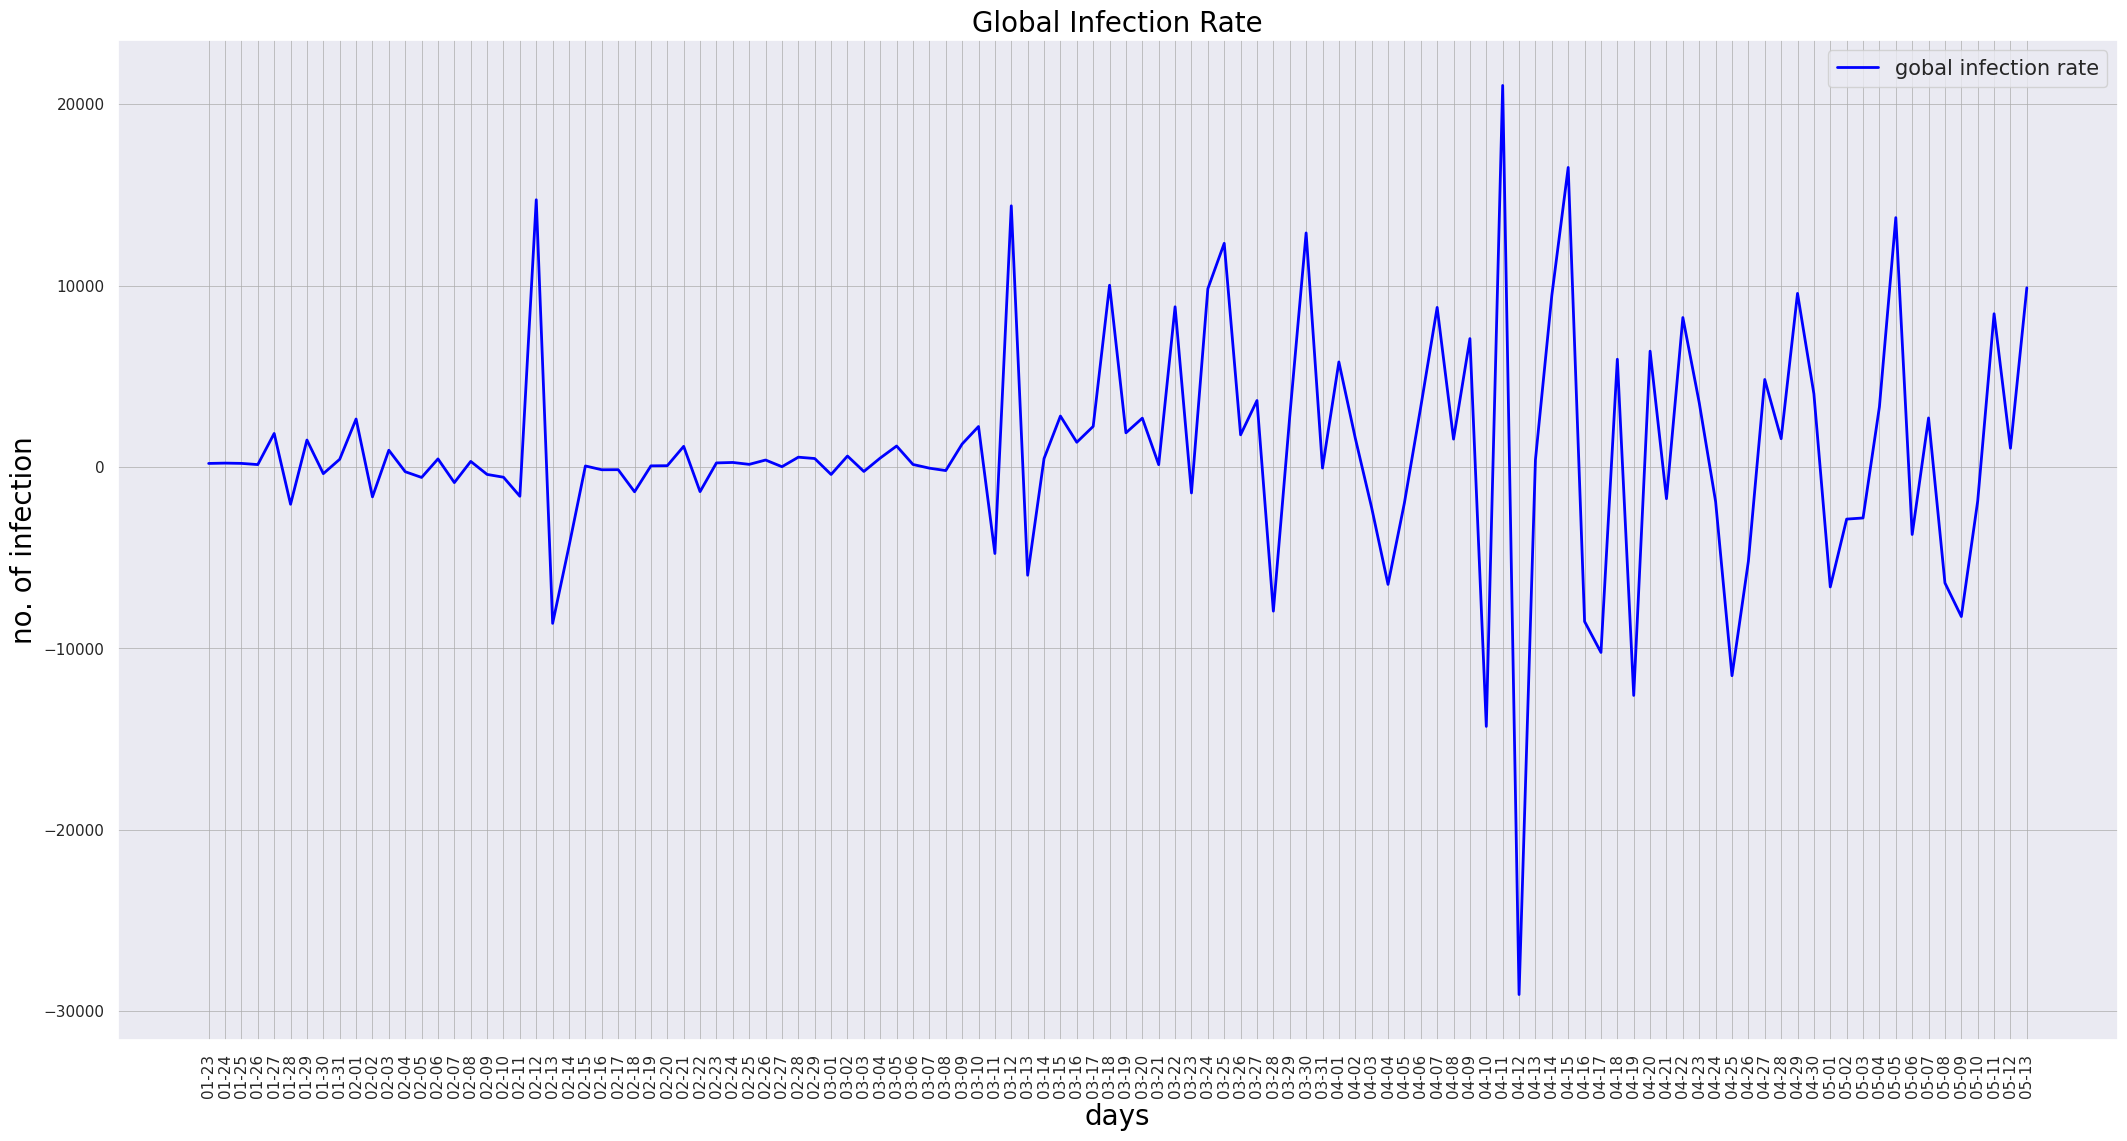

In [ ]:
fig = plt.figure(figsize=(40,20),facecolor='white',edgecolor='black')
axes= fig.add_axes([0.5,0.5,0.5,0.5])

axes.plot(days,rate,lw=2,color='blue',label ='gobal infection rate')
plt.xlabel('days',font)
plt.ylabel('no. of infection',font)
plt.title('Global Infection Rate',font)
plt.xticks(rotation = 90)
plt.grid(color='#ababab',linestyle='-',linewidth =0.5)
axes.legend(prop ={'size':15})

**Question 3**

What is that rate of death everyday in the world

In [ ]:
death_rate =[]
for i in range (1,len(deaths)-1):
  today = deaths[i]
  tomorrow = deaths[i+1]
  death_rate.append(tomorrow-today)

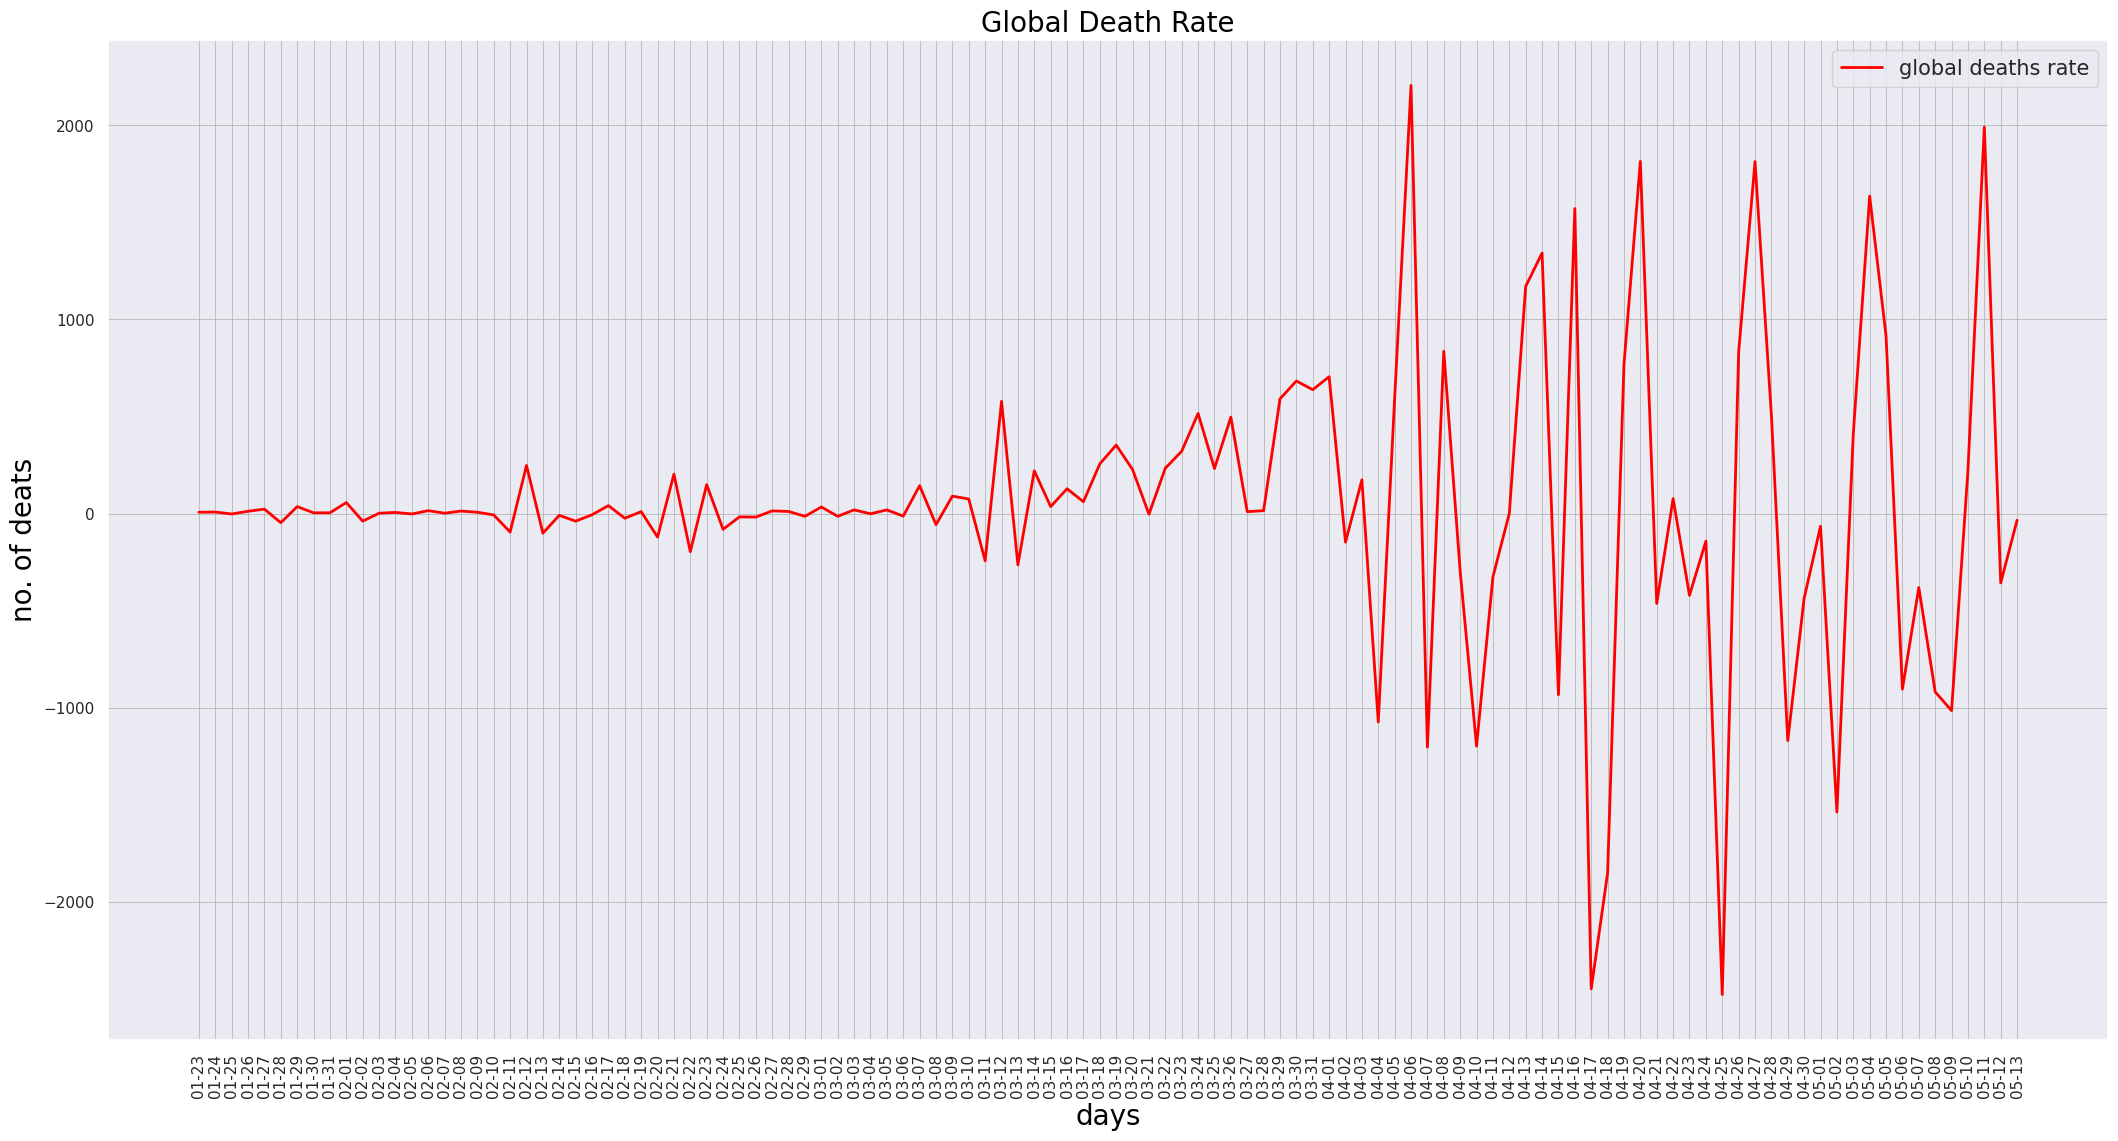

In [ ]:
fig = plt.figure(figsize=(40,20),facecolor='white',edgecolor='black')
axes= fig.add_axes([0.5,0.5,0.5,0.5])

axes.plot(days,death_rate,lw =2, color = 'red', label = 'global deaths rate')
plt.xlabel('days', font)
plt.ylabel('no. of deats',font)
plt.title('Global Death Rate',font)
plt.xticks(rotation= 90)
plt.grid(color='#ababab',linestyle='-',linewidth=0.5)
axes.legend(prop={'size':15})